In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt

## First model simple diffusion between two containers

In [2]:
cont1 = {'volume' : 2 ,  # in cubic m
              'area' : 3 }
cont2 = {'volume' : 5 ,
              'area' : 3 }
area_bw    = 0.5             # sq m 
dx         = 0.1

In [3]:
d_sol = 300 *1e-6                # (1e-12)  #   300 µm^2 / s
sol1 = 6                #  initial moles of solute in container 1
sol2 = 4                #  initial moles of solute in container 2
sol0 = sol1 + sol2

In [4]:
times = np.arange(-1,10000,0.1)
#print(times)
data1 = np.zeros(len(times))
data2 = np.zeros(len(times))

In [5]:
flux = lambda x1,x2 : d_sol * (x1-x2)/dx

data1[0] = sol1/cont1['volume']
data2[0] = sol2/cont2['volume']

In [6]:
for i in np.arange(1,len(times)):
    dt = times[i]-times[i-1]
    f  = flux( data1[i-1] , data2[i-1] ) * dt * area_bw
    data1[i] =  -f/cont1['volume'] + data1[i-1]
    data2[i] =  f/cont2['volume'] + data2[i-1]

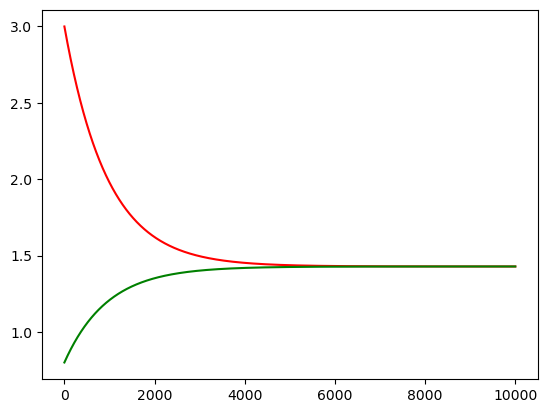

In [7]:
#%matplotlib
plt.plot(times,data1, color='red', linewidth=1.5)
plt.plot(times,data2, color='green', linewidth=1.5)
plt.show()


In [8]:
 data1[-1]*cont1['volume'] + data2[-1]*cont2['volume']

9.999999999999964

In [9]:
data1[-1]

1.4286146354342129

## Adding active diffusion.  I will arbitrarily say that this will pump  from container 2 in to container one.  Additionally, this will 

In [10]:
data1_act = np.zeros(len(times))
data2_act = np.zeros(len(times))
data1_act[0] = sol1/cont1['volume']
data2_act[0] = sol2/cont2['volume']
K2_1 = 0.008

for i in np.arange(1,len(times)):
    dt       = times[i]-times[i-1]
    f        = flux( data1_act[i-1] , data2_act[i-1] ) * dt * area_bw
    act_dif  = K2_1 * data2_act[i-1] * dt
    data1_act[i] =  -f/cont1['volume'] + act_dif*(cont2['volume']/cont1['volume']) + data1_act[i-1]
    data2_act[i] =  f/cont2['volume']  - act_dif + data2_act[i-1]

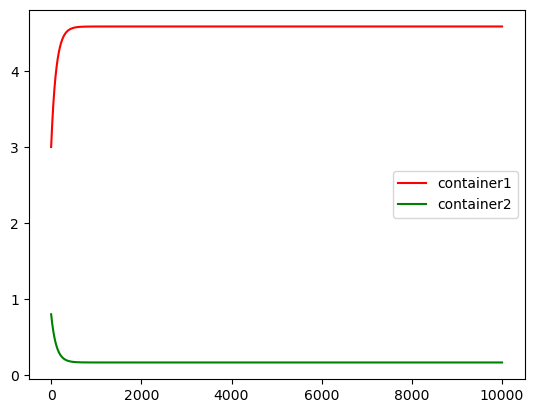

In [11]:
plt.plot(times,data1_act, color='red', linewidth=1.5, label='container1')
plt.plot(times,data2_act, color='green', linewidth=1.5,label='container2')
plt.legend()
plt.show()

In [12]:
 data1_act[-1]*cont1['volume'] + data2_act[-1]*cont2['volume']

9.999999999999314

In [13]:
print(data1_act[-1]*cont1['volume'] , data2_act[-1]*cont2['volume'])

9.171270718231339 0.8287292817679753


In [14]:
alpha = area_bw*d_sol/K2_1/dx

In [15]:
(alpha/cont1['volume']) * 1 / (1 + alpha * (cont1['volume']+cont2['volume'])/(cont1['volume']*cont2['volume'])   )  * sol0

0.8287292817679557

In [16]:
sol0 - (alpha/cont1['volume']) * 1 / (1 + alpha * (cont1['volume']+cont2['volume'])/(cont1['volume']*cont2['volume'])   )  * sol0

9.171270718232044

## Different solutions at the same time

In [17]:
solA1  =  15   # moles
solB1  =  7   # moles
solC1  =  9   # moles
solA2  =  3   # moles
solB2  =  6   # moles
solC2  =  7   # moles

data1_3  =  np.zeros((3, len(times)))
data2_3  =  np.zeros((3, len(times)))

data1_3[0,0], data1_3[1,0],data1_3[2,0] = np.array([solA1, solB1 ,solC1])/cont1['volume']
data2_3[0,0], data2_3[1,0],data2_3[2,0] = np.array([solA2, solB2 ,solC2])/cont2['volume']
for i in np.arange(1,len(times),1):
    dt       = times[i]-times[i-1]
    f        = flux( data1_3[:,i-1] , data2_3[:,i-1] ) * dt * area_bw
    data1_3[:,i] = -f/cont1['volume'] + data1_3[:,i-1]
    data2_3[:,i] = f/cont2['volume'] + data2_3[:,i-1]

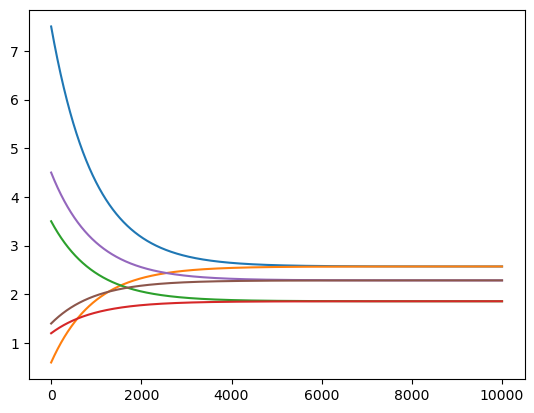

In [18]:
for i in [0,1,2]:
    plt.plot(times, data1_3[i,:])
    plt.plot(times, data2_3[i,:])
plt.show()

In [19]:
(solA1 + solA2)/ ( data1_3[0,-1]*cont1['volume']+data2_3[0,-1]*cont2['volume'] ), \
(solB1 + solB2)/ ( data1_3[1,-1]*cont1['volume']+data2_3[1,-1]*cont2['volume'] ), \
(solC1 + solC2)/ ( data1_3[2,-1]*cont1['volume']+data2_3[2,-1]*cont2['volume'] )

(1.0000000000000082, 0.9999999999999918, 0.9999999999999905)

In [20]:
data1_3[0,0], data1_3[1,0],data1_3[2,0] = np.array([solA1, solB1 ,solC1])/cont1['volume']
data2_3[0,0], data2_3[1,0],data2_3[2,0] = np.array([solA2, solB2 ,solC2])/cont2['volume']
for i in np.arange(1,len(times),1):
    dt       = times[i]-times[i-1]
    f        = flux( data1_3[:,i-1] , data2_3[:,i-1] ) * dt * area_bw
    data1_3[:,i] = -f/cont1['volume'] + data1_3[:,i-1]
    data2_3[:,i] = f/cont2['volume'] + data2_3[:,i-1]
    if (i%10000 ==0)  :
        print(i)
        data1_3[0,i] += 2
        data2_3[0,i] -= 2 * cont1['volume']/cont2['volume']

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


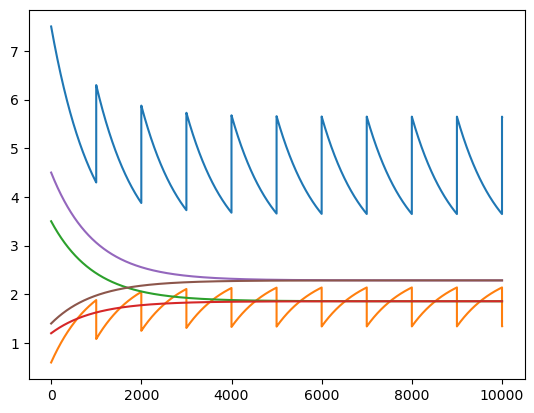

In [21]:
for i in [0,1,2]:
    plt.plot(times, data1_3[i,:])
    plt.plot(times, data2_3[i,:])
plt.show()

## Let's tackle Sarah's Neuron

Learn how to import specifically Sarah's neuron excel data. This then I will need area b/w, delta x between, each volume, whether or not it has a mito.  trial file name:  dorsal_AS5_DD3_part.xlsx